In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../week_03/telco-churn/data.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn. values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
               
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [7]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [9]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8055358410220014

## Accuracy

In [10]:
len(y_val)

1409

In [11]:
(y_val == churn_decision).sum()

1135

In [12]:
accuracy = (y_val == churn_decision).sum() / len(y_val)
accuracy

0.8055358410220014

In [13]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [14]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


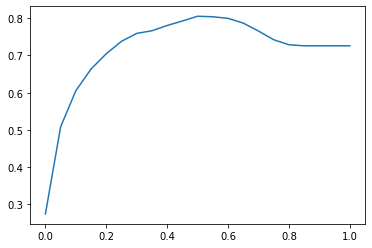

In [15]:
plt.plot(thresholds, scores)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [18]:
accuracy_score(y_val, y_pred >= 0.5)

0.8055358410220014

In [19]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [20]:
from collections import Counter
# predict every customer is not churning
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [21]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [22]:
y_val.mean()
# 27% of users are churning

0.2739531582682754

## Confusion table

In [23]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [24]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [25]:
tp = (predict_positive & actual_positive).sum() #true positive
tn = (predict_negative & actual_negative).sum() #true negative
fp = (predict_positive & actual_negative).sum() #false positive
fn = (predict_negative & actual_positive).sum() #false negative

In [26]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[923, 100],
       [174, 212]])

In [27]:
# relative numbers
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.66, 0.07],
       [0.12, 0.15]])

In [28]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8055358410220014

In [29]:
precision = tp / (tp + fp)
precision

0.6794871794871795

In [30]:
recall = tp / (tp + fn)
recall

0.5492227979274611

## ROC Curves

True Positive Rate and False Positive Rate

In [31]:
tpr = tp / (tp + fn)
tpr

0.5492227979274611

In [32]:
recall

0.5492227979274611

In [33]:
fpr = fp / (tn + fp)
fpr

0.09775171065493646

In [34]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum() #true positive
    tn = (predict_negative & actual_negative).sum() #true negative
    fp = (predict_positive & actual_negative).sum() #false positive
    fn = (predict_negative & actual_positive).sum() #false negative

    scores.append((t, tp, fp, fn, tn))

In [35]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [36]:
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,901,1,122
2,0.02,383,808,3,215
3,0.03,382,753,4,270
4,0.04,382,714,4,309


In [37]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [38]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,537,19,486,0.950777,0.524927
20,0.2,337,367,49,656,0.873057,0.358749
30,0.3,292,245,94,778,0.756477,0.239492
40,0.4,252,175,134,848,0.652850,0.171065
50,0.5,212,100,174,923,0.549223,0.097752
60,0.6,155,51,231,972,0.401554,0.049853
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


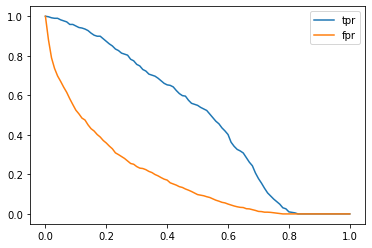

In [39]:
plt.plot(df_scores.threshold, df_scores.tpr, label='tpr')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'fpr')
plt.legend()

Random Model

In [40]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [41]:
# for each customer, we made a random prediction
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [42]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [43]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum() #true positive
        tn = (predict_negative & actual_negative).sum() #true negative
        fp = (predict_positive & actual_negative).sum() #false positive
        fn = (predict_negative & actual_positive).sum() #false negative

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

In [44]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [45]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


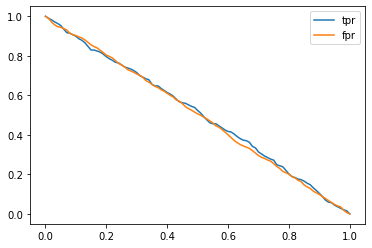

In [46]:
plt.plot(df_rand.threshold, df_rand.tpr, label='tpr')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'fpr')
plt.legend()

## Ideal model

In [47]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [48]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [50]:
1 - y_val.mean()

0.7260468417317246

In [51]:
((y_ideal_pred >= 0.7260) == y_ideal).mean()

1.0

In [52]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [53]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


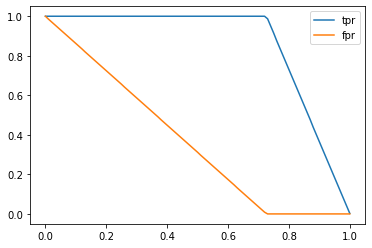

In [54]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='tpr')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'fpr')
plt.legend()

Putting everything together

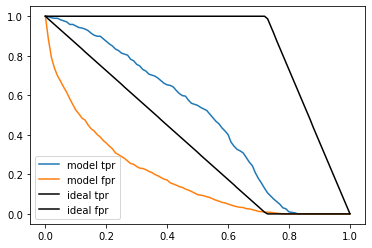

In [55]:
plt.plot(df_scores.threshold, df_scores.tpr, label='model tpr')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'model fpr')

#plt.plot(df_rand.threshold, df_rand.tpr, label='rand tpr')
#plt.plot(df_rand.threshold, df_rand.fpr, label = 'rand fpr')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='ideal tpr', color = 'black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'ideal fpr', color='black')

plt.legend()

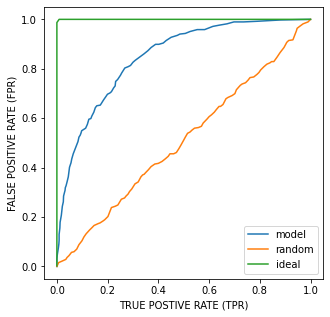

In [56]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('TRUE POSTIVE RATE (TPR)')
plt.ylabel('FALSE POSITIVE RATE (FPR)')

plt.legend()

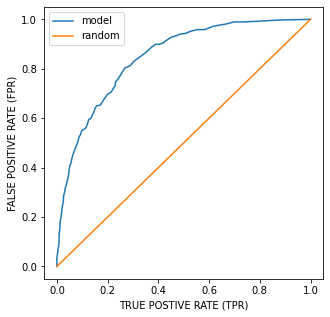

In [57]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
# DONT NEED TO PLOT ITplt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('TRUE POSTIVE RATE (TPR)')
plt.ylabel('FALSE POSITIVE RATE (FPR)')

plt.legend()

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

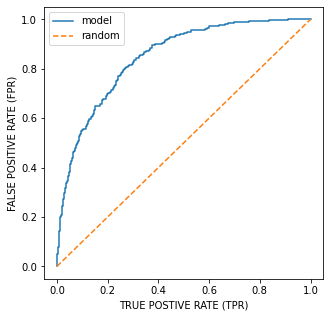

In [60]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')
# DONT NEED TO PLOT ITplt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('TRUE POSTIVE RATE (TPR)')
plt.ylabel('FALSE POSITIVE RATE (FPR)')

plt.legend()

In [61]:
from sklearn.metrics import auc

In [62]:
auc(fpr, tpr)

0.8465956573929162

In [63]:
auc(df_scores.fpr, df_scores.tpr)

0.8463208889834327

In [64]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_val, y_pred)

0.8465956573929162

In [67]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1 ]

In [68]:
import random

In [69]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [70]:
pos[pos_ind] > neg[neg_ind]

True

In [71]:
n = 100_000
success = 0
success_2 = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    success = success + (pos[pos_ind] > neg[neg_ind])
    if pos[pos_ind] > neg[neg_ind]:
        success_2 = success_2 + 1
success

84548

In [72]:
success / n

0.84548

In [73]:
success_2 / n

0.84548

In [74]:
# vectorized form
n = 100_000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [75]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.84533

## Cross Validation


In [76]:
def train(df, y):
    dicts = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y)

    return dv, model

In [77]:
dv, model = train(df_train, y_train)

In [78]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records') #as if df is ok here

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [79]:
y_pred = predict(df_val, dv, model)

In [80]:
from sklearn.model_selection import KFold

In [81]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [82]:
kfold.split(df_train_full)

<generator object _BaseKFold.split at 0x00000189E60583C0>

In [83]:
train_idx, val_idx = next(kfold.split(df_train_full))

In [84]:
len(train_idx), len(val_idx)

(5070, 564)

In [85]:
len(df_train_full)

5634

In [86]:
df_train = df_train_full.iloc[train_idx]
df_val = df_train_full.iloc[val_idx]

In [87]:
from tqdm.auto import tqdm

In [88]:
scores = []
for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

10it [00:05,  1.74it/s]


In [89]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.842 +- 0.012


Cross validation can be used to tune model parameters.
For logistic regression (like with linear regression) we have one parameter to tune for regularization.


In [90]:
def train(df, y, C=1.0):
    dicts = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y)

    return dv, model

In [91]:
dv, model = train(df_train, y_train, C=10)

In [94]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)

    for train_idx, val_idx in \
            kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:06<00:39,  6.65s/it]

C=0.001 0.826 +- 0.012


 29%|██▊       | 2/7 [00:16<00:42,  8.40s/it]

C=0.01 0.841 +- 0.012


 43%|████▎     | 3/7 [00:25<00:35,  8.77s/it]

C=0.1 0.841 +- 0.012


 57%|█████▋    | 4/7 [00:32<00:24,  8.03s/it]

C=0.5 0.841 +- 0.011


 71%|███████▏  | 5/7 [00:39<00:15,  7.61s/it]

C=1 0.840 +- 0.013


 86%|████████▌ | 6/7 [00:47<00:07,  7.99s/it]

C=5 0.841 +- 0.012


100%|██████████| 7/7 [00:54<00:00,  7.83s/it]

C=10 0.841 +- 0.011


C=1 seems to be fine
Now we need to train our model with the full dataset

In [95]:
dv, model = train(df_train_full, df_train_full.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

It's fine that it went up a little. As long as it is not drastically different between the previous result

When we have a large data set, we can hold out part of the data for validation.
When we have small data set, it's best to use kfold. Also if you want to have standard deviation to see how stable the model is. For larger data sets 2-3 splits is fine. For smaller ones maybe 10 is best.